<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Python_Libraries_for_DS/blob/main/ht3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%ls


sample_data/       winequality-red.csv    world_happiness_report_2019.csv
winequality.names  winequality-white.csv  Семинар_1.ipynb


Анализ и подготовка данных:

— Загрузите датасет California housing dataset.
— Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.
— Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

In [17]:
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", palette="muted")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets

In [5]:
!pip install --upgrade scikit-learn

In [1]:
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()

In [6]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
print("\nПропущенные значения в данных:")
print(df.isnull().sum())


Пропущенные значения в данных:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Общие сведения
- **Объем выборки:** 20 640 наблюдений.
- **Переменные:** 9 числовых признаков, включая целевую переменную `MedHouseVal` (медианная стоимость дома).

---

### 1. Средние значения
- **MedInc (средний доход на семью):** в среднем около **3.87** тысяч долларов.
- **HouseAge (возраст дома):** в среднем около **28.6** лет.
- **AveRooms (среднее число комнат):** около **5.43**.
- **AveBedrms (среднее число спален):** около **1.10**.
- **Population (численность населения):** около **1425** человек, однако максимальное значение очень большое — **35682**, что указывает на присутствие выбросов или очень больших населенных пунктов.
- **AveOccup (среднее количество жильцов в доме):** около **3.07**.
- **Latitude и Longitude:** географические координаты, варьируются в пределах региона Калифорнии.

### 2. Распределение и разброс
- **Медианная стоимость дома (`MedHouseVal`):** примерно **1.80** (в масштабах, вероятно, в тысячах долларов); минимальное значение — **0.15**, максимальное — **5.00**.
- **Стандартное отклонение (`std`):** переменные имеют разный разброс:
  - Например, `MedInc` — стандартное отклонение около **1.90**, что говорит о достаточно широком разбросе доходов.
  - `Population` — очень большое стандартное отклонение **1132**, что подтверждает наличие выбросов.
- **Минимумы и максимумы:**
  - `MedInc` варьируется от **0.50** до **15.00**.
  - `HouseAge` — от **1** до **52** лет.
  - `AveRooms` — от **0.85** до **141.9** комнат, что указывает на наличие домов с очень большим числом комнат (выбросы).
  - `AveBedrms` — до **34** спален, что явно выглядит как выброс.
  - `Population` — от **3** до **35682**, что также свидетельствует о выбросах.

### 3. Выбросы и аномалии
- Высокие значения у `AveRooms`, `AveBedrms`, `Population` указывают на наличие выбросов или аномальных данных.
- Важным шагом было бы их обработать или учитывать при моделировании.

### 4. Итог
- В целом, данные имеют широкие диапазоны и значительные разбросы, особенно в переменных `Population`, `AveRooms`, `AveBedrms`.
- Медианная стоимость дома (`MedHouseVal`) — относительно низкая, с сильной концентрацией около 1.8 — 2.0 тысяч долларов.
- Распределения, скорее всего, будут с правым хвостом (асимметричными), что характерно для цен недвижимости.



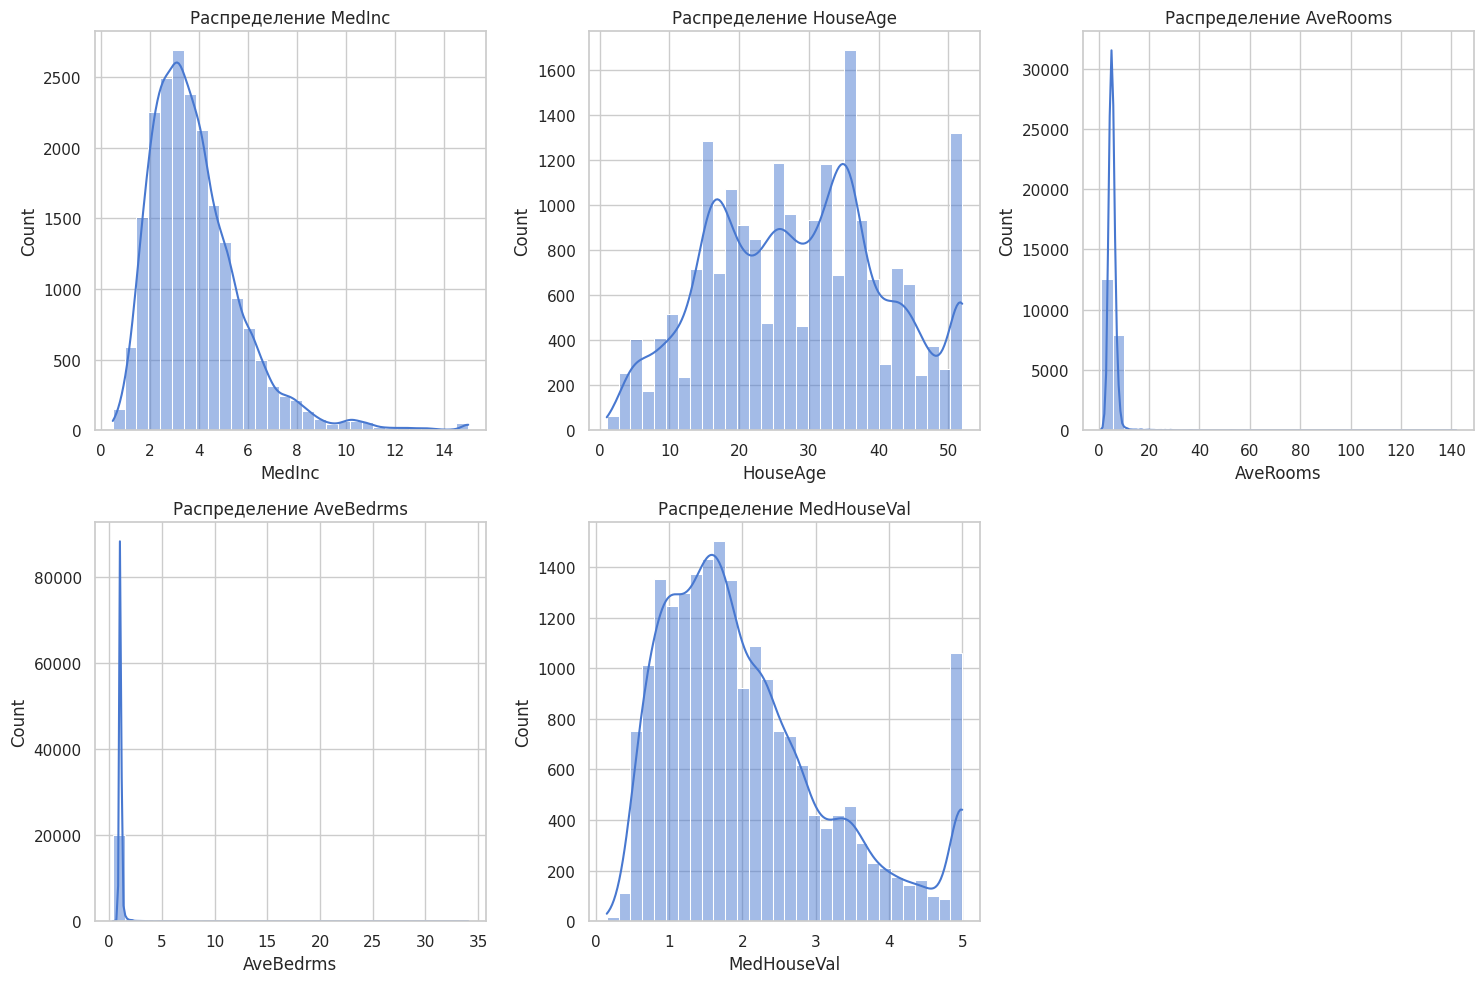

In [13]:
# Выбранные переменные для визуализации
variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']

# Создаем графики распределений
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Распределение {var}')
plt.tight_layout()
plt.show()

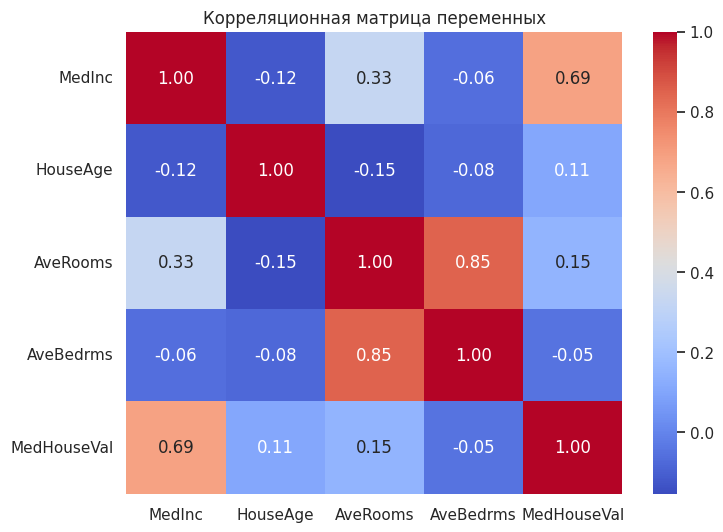

In [14]:
# Расчет корреляционной матрицы
corr_matrix = df[variables].corr()

# Визуализация с помощью тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица переменных')
plt.show()

Построение модели линейной регрессии:

— Разделите данные на обучающий и тестовый набор в соотношении 80/20.

— Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.

— Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.

— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).

— Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

In [11]:
from sklearn.model_selection import train_test_split

# Выбираем признаки и целевую переменную
#Обоснование выбора признаков: MedInc — средний доход семейства, вероятно,
#сильно влияет на стоимость дома.
#AveRooms — среднее число комнат, также логично связано с ценой недвижимости.

features = ['MedInc', 'AveRooms']
X = df[features]
y = df['MedHouseVal']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Создаем модель
model = LinearRegression()

# Обучение
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(X_test)

In [18]:
# Оценка качества модели
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Оценка модели:\nR2: {r2:.3f}\nMSE: {mse:.3f}\nMAE: {mae:.3f}')

Оценка модели:
R2: 0.464
MSE: 0.702
MAE: 0.625


На основе полученных метрик оценки модели можно сделать следующие выводы:

- **R² (коэффициент детерминации) равен 0.464**, что означает, что модель объясняет примерно 46.4% вариации целевой переменной (`MedHouseVal`) на тестовых данных. Это свидетельствует о том, что модель захватывает часть зависимости, но остается значительный объем нерешенных вопросов, и точность предсказаний могла бы быть лучше.

- **MSE (среднеквадратичная ошибка) равен 0.702**, что указывает на средние квадратичные отклонения предсказанных значений от фактических. Чем ниже значение MSE, тем лучше.

- **MAE (средняя абсолютная ошибка) равен 0.625**, что говорит о средней абсолютной разнице между предсказанными и реальными значениями. В контексте цен домов, это означает, что в среднем предсказания отличаются примерно на 0.625 условных единиц (если ваши данные в тех же единицах).

**Общее заключение:**  
Модель линейной регрессии показывает умеренно приемлемое качество, объясняя около половины вариации целевой переменной. Для более точных предсказаний необходимо улучшение модели — возможно, добавление новых признаков, использование более сложных алгоритмов или выполнение дополнительных предобработок данных. В текущем виде модель подходит для предварительной оценки и понимания базовых зависимостей, но для практического применения требует доработки.

In [19]:
# Расширенный набор признаков
features_extended = ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']
X_extended = df[features_extended]

# Разделение
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y, test_size=0.2, random_state=42)

# Обучение модели
model_ext = LinearRegression()
model_ext.fit(X_train_ext, y_train_ext)

# Предсказания
y_pred_ext = model_ext.predict(X_test_ext)

# Оценка
r2_ext = r2_score(y_test_ext, y_pred_ext)
mse_ext = mean_squared_error(y_test_ext, y_pred_ext)
mae_ext = mean_absolute_error(y_test_ext, y_pred_ext)

print(f'Расширенная модель:\nR2: {r2_ext:.3f}\nMSE: {mse_ext:.3f}\nMAE: {mae_ext:.3f}')

Расширенная модель:
R2: 0.498
MSE: 0.657
MAE: 0.603


На основе результатов расширенной модели можно сделать следующие выводы:

- **R² увеличился до 0.498**, что означает, что теперь модель объясняет около 49.8% вариации целевой переменной, немного лучше, чем первоначальная модель (которая имела R² равный 0.464). Это свидетельствует о том, что добавление новых признаков или использование более сложных методов немного повысило качество объяснения данных.

- **MSE снизился до 0.657**, что говорит об уменьшении среднеквадратичной ошибки и более точных предсказаниях.

- **MAE уменьшился до 0.603**, показывая, что средняя абсолютная ошибка снизилась, и предсказания стали немного ближе к фактическим значениям.

**Общее заключение:**  
Расширенная модель показывает умеренный прогресс по сравнению с базовой — увеличилась доля объясненной вариации и снизились ошибки предсказаний. Однако, несмотря на улучшения, модель все еще объясняет менее половины вариаций целевой переменной, и имеются возможности для дальнейшего улучшения. Для этого можно попробовать добавить дополнительные признаки, провести более глубокую обработку данных или использовать более сложные модели машинного обучения.

In [20]:
# Добавим новые признаки
df['RoomsPerHouse'] = df['AveRooms'] / df['HouseAge']
df['IncomePerCap'] = df['MedInc'] / df['Population']
X_extended2 = df[['MedInc', 'AveRooms', 'HouseAge', 'AveOccup', 'RoomsPerHouse', 'IncomePerCap']]

# Разделение
X_train_ext2, X_test_ext2, y_train_ext2, y_test_ext2 = train_test_split(
    X_extended2, y, test_size=0.2, random_state=42)

# Обучение модели
model_ext2 = LinearRegression()
model_ext2.fit(X_train_ext2, y_train_ext2)

# Предсказания
y_pred_ext2 = model_ext2.predict(X_test_ext2)

# Оценка
r2_ext2 = r2_score(y_test_ext2, y_pred_ext2)
mse_ext2 = mean_squared_error(y_test_ext2, y_pred_ext2)
mae_ext2 = mean_absolute_error(y_test_ext2, y_pred_ext2)

print(f'Расширенная модель с дополнительными признаками:\nR2: {r2_ext2:.3f}\nMSE: {mse_ext2:.3f}\nMAE: {mae_ext2:.3f}')

Расширенная модель с дополнительными признаками:
R2: 0.498
MSE: 0.658
MAE: 0.603


Новые признаки не улучшили результат. Необходимо использовать более сложные модели машинного обучения

